# Write a Data Science Blog Post - Udacity Data Scientist Nanodegree - Analyzing Airbnb Data for the cities of Bordeaux, Lyon, and Paris (France) #
 
## The Data ##
[http://insideairbnb.com/get-the-data.html](http://insideairbnb.com/get-the-data.html) for Bordeaux, Lyon, and Paris:
 - **listings.csv**    Detailed Listings
 - **calendar.csv**    Availability Dates and Prices for Listings
 - **reviews.csv**     Detailed Review Data for Listings
 - **listings_2.csv**       Summary information and metrics for listings (good for visualisations)
 - **reviews_2.csv**        Summary Review data and Listing ID (to facilitate time based analytics and visualisations linked to a listing)

## The Questions ##
Compare **Prices** in all **3 Cities** and find the **primary Factors** for setting them:
1. **Price Distribution**
2. **Price and Availability throughout the Season**
3. **Features** for explaining **Prices**

In [1]:
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import r2_score #, confusion_matrix, accuracy_score

import matplotlib.pyplot as plt
import matplotlib.dates as plt_dates
import numpy as np
import datetime as dt
%matplotlib inline
from pprint import pprint

## Visualize the Data Files ##
### Listings (Bordeaux) ###

In [2]:
listings_Bx_df = pd.read_csv('../Data/listings_Bx.csv', parse_dates=['last_scraped'], dtype={'zipcode': str, 'weekly_price': str, 'monthly_price': str})    # Cf. explanation for dtype below
print("There are {} Listings in Bordeaux, the {} Features are:\n\n{}\n".format(
    listings_Bx_df.shape[0], listings_Bx_df.shape[1], listings_Bx_df.columns.tolist()))    # columns.tolist() avoids truncating the list
listings_Bx_df.head()

There are 10939 Listings in Bordeaux, the 106 Features are:

['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,40151,https://www.airbnb.com/rooms/40151,20190827041351,2019-08-27,Sunny flat aux Chartrons,"Situé dans le quartier des Chartrons, cet appa...","Situé dans le quartier des Chartrons, cet appa...","Situé dans le quartier des Chartrons, cet appa...",none,Le quartier des Chartrons est situé dans le ce...,...,f,f,moderate,f,f,2,1,1,0,0.28
1,185534,https://www.airbnb.com/rooms/185534,20190827041351,2019-08-27,L'Echoppe des Bouilles,NaN,L’Échoppe des Bouilles est une maison typique ...,L’Échoppe des Bouilles est une maison typique ...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,1,0,1,0,NaN
2,218103,https://www.airbnb.com/rooms/218103,20190827041351,2019-08-27,B&B (Website hidden by Airbnb) tropical garden,Ce studio spacieux de 35 m² est tout équipé po...,"The Bambooyard : ""Le clos des Bambous"", in Bè...","The Bambooyard : ""Le clos des Bambous"", in Bè...",none,Idéalement situé Bordeaux Sud à l'entrée de Bè...,...,t,f,strict_14_with_grace_period,f,f,4,4,0,0,0.28
3,222887,https://www.airbnb.com/rooms/222887,20190827041351,2019-08-27,"Bordeaux Terrace - spectacular view, fast Wifi","Recently renovated (February 2019), Bordeaux T...",In an 18th century building in the historic he...,"Recently renovated (February 2019), Bordeaux T...",none,Bordeaux Terrace is ideally situated to visit ...,...,t,f,strict_14_with_grace_period,f,f,4,4,0,0,0.38
4,317273,https://www.airbnb.com/rooms/317273,20190827041351,2019-08-27,"Bordeaux City Gardens - large 1 bd, park adjacent",A spacious one bedroom apartment (93 sq metres...,This spacious one bedroom apartment (93 sq met...,A spacious one bedroom apartment (93 sq metres...,none,Bordeaux's famous Jardin Public is at the end ...,...,t,f,moderate,f,f,4,4,0,0,0.31


pd.**read_csv** was passed the argument **dtype={'zipcode': str, 'weekly_price': str, 'monthly_price': str}** above, because it was originally complaining about columns 43, 61, and 62, so I make sure they're loaded as Strings:

In [3]:
listings_Bx_df.iloc[0:10, [43, 61, 62]]

,zipcode,weekly_price,monthly_price
0,33300,$350.00,"$1,250.00"
1,33000,NaN,NaN
2,33130,$630.00,NaN
3,33000,NaN,NaN
4,33000,NaN,NaN
5,33000,NaN,NaN
6,33000,$500.00,"$1,400.00"
7,33130,NaN,NaN
8,33000,NaN,NaN
9,33130,$490.00,NaN


### Calendar (Bordeaux) ###

In [4]:
calendar_Bx_df = pd.read_csv('../Data/calendar_Bx.csv', parse_dates=['date'])
print("\nThere are {} Calendar entries in Bordeaux, the {} Features are:\n\n{}\n".format(
    calendar_Bx_df.shape[0], calendar_Bx_df.shape[1], calendar_Bx_df.columns.tolist()))    # columns.tolist() avoids truncating the list
print("\nThe {} individual Dates span from {} to {}\n".format(
    calendar_Bx_df['date'].nunique(),
    calendar_Bx_df['date'].min().strftime('%d %b %Y'),
    calendar_Bx_df['date'].max().strftime('%d %b %Y')))
calendar_Bx_df.head()


There are 3992735 Calendar entries in Bordeaux, the 7 Features are:

['listing_id', 'date', 'available', 'price', 'adjusted_price', 'minimum_nights', 'maximum_nights']


The 365 individual Dates span from 27 Aug 2019 to 25 Aug 2020



,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,1190768,2019-08-27,f,$80.00,$80.00,5,355
1,1190768,2019-08-28,f,$80.00,$80.00,5,355
2,1190768,2019-08-29,f,$80.00,$80.00,5,355
3,1190768,2019-08-30,f,$90.00,$90.00,5,355
4,1190768,2019-08-31,f,$90.00,$90.00,5,355


### Reviews (Bordeaux) ###

In [5]:
reviews_Bx_df = pd.read_csv('../Data/reviews_Bx.csv', parse_dates=['date'])
print("\nThere are {} Reviews in Bordeaux, the {} Features are:\n\n{}\n".format(
    reviews_Bx_df.shape[0], reviews_Bx_df.shape[1], reviews_Bx_df.columns.tolist()))    # columns.tolist() avoids truncating the list
reviews_Bx_df.head()


There are 216305 Reviews in Bordeaux, the 6 Features are:

['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments']



,listing_id,id,date,reviewer_id,reviewer_name,comments
0,40151,99743,2010-09-18,175507,Elizabeth,"Cédric is a great guy! Very hospitable, helpfu..."
1,40151,190588,2011-03-01,135370,Tia,This is a beautiful and spacious apartment wit...
2,40151,199158,2011-03-14,414855,Natalie,Cedric was a wonderful host and his apartment ...
3,40151,307773,2011-06-11,359935,Jim,Cedric's home is clean and modern and well app...
4,40151,328283,2011-06-22,91394,B Harrison,Cedric was fabulous and really went out of his...


In [6]:
listings_Bx_2_df = pd.read_csv('../Data/listings_Bx_2.csv')
print("\nThere are {} Listing_Bx_2 entries, the {} Features are:\n\n{}\n".format(
    listings_Bx_2_df.shape[0], listings_Bx_2_df.shape[1], listings_Bx_2_df.columns.tolist()))    # columns.tolist() avoids truncating the list
listings_Bx_2_df.head()


There are 10939 Listing_Bx_2 entries, the 16 Features are:

['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']



,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,40151,Sunny flat aux Chartrons,165163,Cédric,Bordeaux,Chartrons - Grand Parc - Jardin Public,44.85653,-0.57460,Entire home/apt,71,3,30,2016-07-29,0.28,2,297
1,185534,L'Echoppe des Bouilles,890736,Carlos,Bordeaux,Saint Augustin - Tauzin - Alphonse Dupeux,44.83063,-0.59331,Private room,75,1,0,NaN,NaN,1,365
2,218103,B&B (Website hidden by Airbnb) tropical garden,1127981,Luis,Bgles,Bgles,44.81418,-0.54842,Entire home/apt,100,2,27,2019-07-28,0.28,4,219
3,222887,"Bordeaux Terrace - spectacular view, fast Wifi",1156398,Suzanna,Bordeaux,Bordeaux Sud,44.83635,-0.56590,Entire home/apt,175,3,35,2019-05-27,0.38,4,319
4,317273,"Bordeaux City Gardens - large 1 bd, park adjacent",1156398,Suzanna,Bordeaux,Chartrons - Grand Parc - Jardin Public,44.84734,-0.58034,Entire home/apt,155,3,19,2019-08-05,0.31,4,315


In [7]:
reviews_Bx_2_df = pd.read_csv('../Data/reviews_Bx_2.csv')
print("\nThere are {} Reviews_Bx_2 entries, the {} Features are:\n\n{}\n".format(
    reviews_Bx_2_df.shape[0], reviews_Bx_2_df.shape[1], reviews_Bx_2_df.columns.tolist()))    # columns.tolist() avoids truncating the list
reviews_Bx_2_df.head()


There are 216305 Reviews_Bx_2 entries, the 2 Features are:

['listing_id', 'date']



,listing_id,date
0,40151,2010-09-18
1,40151,2011-03-01
2,40151,2011-03-14
3,40151,2011-06-11
4,40151,2011-06-22


### Selecting the Data Sources ###
 - **reviews_Bx.csv** would be useful if we decided to apply Natural Language Processing (NLP) to the "comments" feature, but this would be a little overkill in the context of this assignment.
 - **listings_Bx_2.csv** displays a relevant subset of the features in **listings.csv*** features, but not enough, so I won't use it.
 - **reviews_Bx_2.csv** seems totally useless...
 
 I'll focus on the Listings and Calendar data.
 
## Load Lyon and Paris Data ##

In [8]:
listings_Ly_df = pd.read_csv('../Data/listings_Ly.csv', parse_dates=['last_scraped'], dtype={'zipcode': str, 'weekly_price': str, 'monthly_price': str})
print("\nThere are {} Listings in Lyon with {} Features\n".format(
    listings_Ly_df.shape[0], listings_Ly_df.shape[1]))    # columns.tolist() avoids truncating the list
listings_Ly_df[0:1]


There are 11755 Listings in Lyon with 106 Features



,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,30187,https://www.airbnb.com/rooms/30187,20190717005527,2019-07-17,Le Petit Tramassac - Old town Lyon,NaN,Le Petit Tramassac welcome you in the heart of...,Le Petit Tramassac welcome you in the heart of...,none,NaN,...,t,f,strict_14_with_grace_period,f,f,7,7,0,0,0.28


In [9]:
calendar_Ly_df = pd.read_csv('../Data/calendar_Ly.csv', parse_dates=['date'])
print("\nThere are {} Calendar entries in Lyon with the {} Features\n".format(
    calendar_Ly_df.shape[0], calendar_Ly_df.shape[1], calendar_Ly_df.columns.tolist()))    # columns.tolist() avoids truncating the list
calendar_Ly_df[0:1]


There are 4290575 Calendar entries in Lyon with the 7 Features



,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,815342,2019-07-17,t,$55.00,$55.00,2,90


In [10]:
listings_Pa_df = pd.read_csv('../Data/listings_Pa.csv', parse_dates=['last_scraped'], dtype={'zipcode': str, 'weekly_price': str, 'monthly_price': str})
print("\nThere are {} Listings in Paris with {} Features\n".format(
    listings_Pa_df.shape[0], listings_Pa_df.shape[1]))    # columns.tolist() avoids truncating the list
listings_Pa_df[0:1]


There are 64293 Listings in Paris with 106 Features



,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3109,https://www.airbnb.com/rooms/3109,20190709213457,2019-07-10,zen and calm,Appartement très calme de 50M2 Utilisation de ...,I bedroom appartment in Paris 14,I bedroom appartment in Paris 14 Good restaura...,none,Good restaurants very close the Montparnasse S...,...,f,f,flexible,f,f,1,1,0,0,0.26


In [11]:
calendar_Pa_df = pd.read_csv('../Data/calendar_Pa.csv', parse_dates=['date'])
print("\nThere are {} Calendar entries in Paris with the {} Features\n".format(
    calendar_Pa_df.shape[0], calendar_Pa_df.shape[1], calendar_Pa_df.columns.tolist()))    # columns.tolist() avoids truncating the list
calendar_Pa_df[0:1]


There are 23467355 Calendar entries in Paris with the 7 Features



,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,3109,2019-07-10,f,$75.00,$75.00,3.0,15.0


___
# 1 & 2 - Compare Price Distribution and Price Values throughout the year for all 3 Cities #

### Clean up the Calendar Data ###

Remove any datapoints with missing Price or Availability information.

In [12]:
print("\nPrice Data readiness in\n- Bordeaux: {}\n- Lyon: {}\n- Paris: {}\n".format(
    (1 - calendar_Bx_df.isnull()['price'].mean()) * 100,
    (1 - calendar_Ly_df.isnull()['price'].mean()) * 100,
    (1 - calendar_Pa_df.isnull()['price'].mean()) * 100))

print("\nAvailability Data readiness in\n- Bordeaux: {}\n- Lyon: {}\n- Paris: {}\n".format(
    (1 - calendar_Bx_df.isnull()['available'].mean()) * 100,
    (1 - calendar_Ly_df.isnull()['available'].mean()) * 100,
    (1 - calendar_Pa_df.isnull()['available'].mean()) * 100))


Price Data readiness in
- Bordeaux: 100.0
- Lyon: 100.0
- Paris: 99.99922019332813


Availability Data readiness in
- Bordeaux: 100.0
- Lyon: 100.0
- Paris: 100.0



Paris has missing Price data, we need to remove it.
We also need to convert the Price Data from Strings ('$ 123.45') to Floats (123.45)

In [13]:
datapoints_before = calendar_Pa_df.shape[0]
calendar_Pa_df = calendar_Pa_df.dropna(subset=['price'], axis=0)
print("\n{} datapoints were removed from the Paris Calendar Data.\n".format(datapoints_before - calendar_Pa_df.shape[0]))


183 datapoints were removed from the Paris Calendar Data.



In [14]:
cal_Bx_clean_prices_df = calendar_Bx_df.copy()
cal_Bx_clean_prices_df['price'] = cal_Bx_clean_prices_df['price'].str.replace('[\$,]', '').astype('float')
cal_Bx_clean_prices_df.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,1190768,2019-08-27,f,80.0,$80.00,5,355
1,1190768,2019-08-28,f,80.0,$80.00,5,355
2,1190768,2019-08-29,f,80.0,$80.00,5,355
3,1190768,2019-08-30,f,90.0,$90.00,5,355
4,1190768,2019-08-31,f,90.0,$90.00,5,355


In [15]:
cal_Ly_clean_prices_df = calendar_Ly_df.copy()
cal_Ly_clean_prices_df['price'] = cal_Ly_clean_prices_df['price'].str.replace('[\$,]', '').astype('float')
cal_Ly_clean_prices_df.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,815342,2019-07-17,t,55.0,$55.00,2,90
1,818799,2019-07-17,f,62.0,$62.00,2,1125
2,818799,2019-07-18,f,62.0,$62.00,2,1125
3,818799,2019-07-19,t,62.0,$62.00,1,1125
4,818799,2019-07-20,t,62.0,$62.00,1,1125


In [16]:
cal_Pa_clean_prices_df = calendar_Pa_df.copy()
cal_Pa_clean_prices_df['price'] = cal_Pa_clean_prices_df['price'].str.replace('[\$,]', '').astype('float')
cal_Pa_clean_prices_df.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,3109,2019-07-10,f,75.0,$75.00,3.0,15.0
1,3109,2019-07-11,f,75.0,$75.00,3.0,15.0
2,3109,2019-07-12,f,75.0,$75.00,3.0,15.0
3,3109,2019-07-13,f,75.0,$75.00,3.0,15.0
4,3109,2019-07-14,f,75.0,$75.00,3.0,15.0


### Plot the Price Distribution from the Calendar Data and compare Bordeaux, Lyon, and Paris ###

1. Build the distribution by ascending Price as the index;
2. Find the lowest and highest Prices for all 3 Cities;
3. Find the Price for all 3 Cities above which listings can be considered to be outliers;
4. Plot and compare Price distributions below the Price limit above for all 3 Cities.

In [17]:
# Build the distribution of Prices, sorted by Price (which is the index)
cal_Bx_price_distribution = cal_Bx_clean_prices_df['price'].value_counts().sort_index()
print("\nIn Bordeaux, prices range from $ {} to $ {}\n".format(
    cal_Bx_price_distribution.index.values.tolist()[0],
    cal_Bx_price_distribution.index.values.tolist()[-1]))


In Bordeaux, prices range from $ 9.0 to $ 4000.0



In [18]:
cal_Bx_price_distribution.head()

9.0      202
10.0    1175
11.0      35
12.0     919
13.0    1005
Name: price, dtype: int64

In [19]:
cal_Bx_price_distribution.tail()

1864.0     10
1967.0      5
2000.0    365
2500.0    365
4000.0      8
Name: price, dtype: int64

In [20]:
cal_Ly_price_distribution = cal_Ly_clean_prices_df['price'].value_counts().sort_index()
print("\nIn Lyon, prices range from $ {} to $ {}\n".format(
    cal_Ly_price_distribution.index.values.tolist()[0],
    cal_Ly_price_distribution.index.values.tolist()[-1]))
cal_Pa_price_distribution = cal_Pa_clean_prices_df['price'].value_counts().sort_index()
print("\nIn Paris, prices range from $ {} to $ {}\n".format(
    cal_Pa_price_distribution.index.values.tolist()[0],
    cal_Pa_price_distribution.index.values.tolist()[-1]))


In Lyon, prices range from $ 9.0 to $ 9400.0


In Paris, prices range from $ 2.0 to $ 25000.0



In [21]:
indices = []
for i in range(0, 25001):
    indices.append(i)
print(indices[:5], " -> ", indices[-5:])

[0, 1, 2, 3, 4]  ->  [24996, 24997, 24998, 24999, 25000]


In [22]:
Bx_values = [0] * 25001
Bx_values[0:5]

[0, 0, 0, 0, 0]

In [23]:
Bx_Price_dist = pd.Series(index=indices, data=Bx_values)
print(Bx_Price_dist.head())
print(Bx_Price_dist.tail())

0    0
1    0
2    0
3    0
4    0
dtype: int64
24996    0
24997    0
24998    0
24999    0
25000    0
dtype: int64


In [24]:
for i in cal_Bx_price_distribution.index:
    Bx_Price_dist[i] += cal_Bx_price_distribution[i]
Bx_Price_dist[0:20]

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9       202
10     1175
11       35
12      919
13     1005
14     1321
15     6407
16     3743
17     4567
18    11435
19     8604
dtype: int64

In [25]:
Bx_Price_dist[-20:]

24981    0
24982    0
24983    0
24984    0
24985    0
24986    0
24987    0
24988    0
24989    0
24990    0
24991    0
24992    0
24993    0
24994    0
24995    0
24996    0
24997    0
24998    0
24999    0
25000    0
dtype: int64

The top ends could be **outliers**. Let's check by calculating the percentage of offerings above a certain price and stop at 0.1 %:

In [26]:
prices = []
percentages = []

for price in np.arange(0, 2500, step=10):
    percent = Bx_Price_dist[Bx_Price_dist.index > price].sum() / cal_Bx_clean_prices_df.shape[0] * 100
    prices.append(price)
    percentages.append(percent)
    print("Bordeaux has {} % offerings above $ {}.".format(percent, price))
    if percent < 0.1:
        break

Bordeaux has 100.0 % offerings above $ 0.
Bordeaux has 99.96551236182717 % offerings above $ 10.
Bordeaux has 98.19048847469216 % offerings above $ 20.
Bordeaux has 88.91694540208654 % offerings above $ 30.
Bordeaux has 75.58440517590073 % offerings above $ 40.
Bordeaux has 60.57173841990515 % offerings above $ 50.
Bordeaux has 48.953010906058125 % offerings above $ 60.
Bordeaux has 39.61850711354498 % offerings above $ 70.
Bordeaux has 31.844036731713977 % offerings above $ 80.
Bordeaux has 26.140127005674056 % offerings above $ 90.
Bordeaux has 20.86857755398242 % offerings above $ 100.
Bordeaux has 18.532735080089214 % offerings above $ 110.
Bordeaux has 15.816977585539737 % offerings above $ 120.
Bordeaux has 13.813438657962523 % offerings above $ 130.
Bordeaux has 12.375977869806034 % offerings above $ 140.
Bordeaux has 10.305016486193049 % offerings above $ 150.
Bordeaux has 9.269861385741853 % offerings above $ 160.
Bordeaux has 8.455882997494198 % offerings above $ 170.
Bordeau

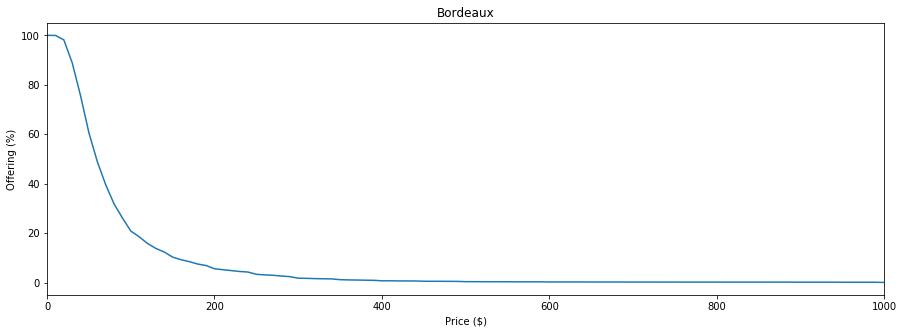

In [27]:
percentage_curve = pd.Series(index=prices, data=percentages)
(percentage_curve).plot(figsize=(15, 5));
plt.title("Bordeaux");
plt.xlabel("Price ($)");
plt.ylabel("Offering (%)");

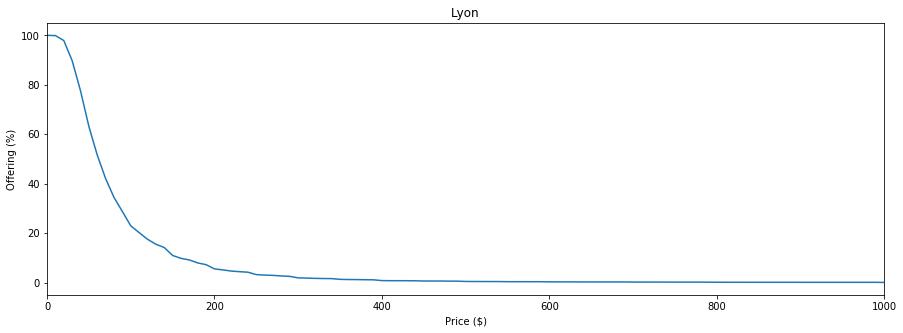

In [28]:
Ly_values = [0] * 25001
Ly_Price_dist = pd.Series(index=indices, data=Ly_values)
for i in cal_Ly_price_distribution.index:
    Ly_Price_dist[i] += cal_Ly_price_distribution[i]
#print(Ly_Price_dist[0:20])
#print(Ly_Price_dist[-20:])

prices = []
percentages = []

for price in np.arange(0, 25000, step=10):
    percent = Ly_Price_dist[Ly_Price_dist.index > price].sum() / cal_Ly_clean_prices_df.shape[0] * 100
    prices.append(price)
    percentages.append(percent)
    #print("Lyon has {} % offerings above $ {}.".format(percent, price))
    if percent < 0.1:
        break
percentage_curve = pd.Series(index=prices, data=percentages)
(percentage_curve).plot(figsize=(15, 5));
plt.title("Lyon");
plt.xlabel("Price ($)");
plt.ylabel("Offering (%)");

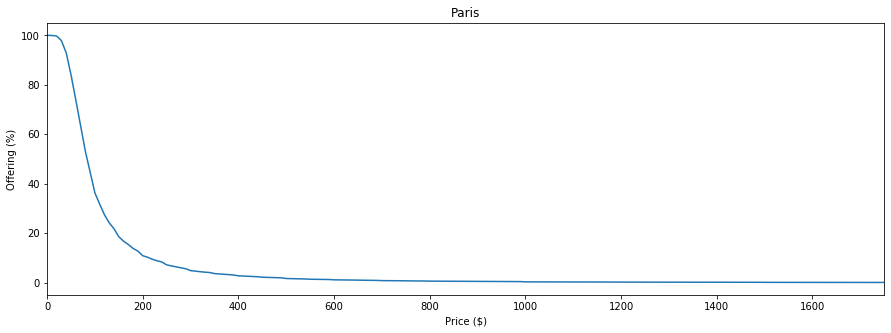

In [29]:
Pa_values = [0] * 25001
Pa_Price_dist = pd.Series(index=indices, data=Pa_values)
for i in cal_Pa_price_distribution.index:
    Pa_Price_dist[i] += cal_Pa_price_distribution[i]
#print(Pa_Price_dist[0:20])
#print(Pa_Price_dist[-20:])

prices = []
percentages = []

for price in np.arange(0, 25000, step=10):
    percent = Pa_Price_dist[Pa_Price_dist.index > price].sum() / cal_Pa_clean_prices_df.shape[0] * 100
    prices.append(price)
    percentages.append(percent)
    #print("Paon has {} % offerings above $ {}.".format(percent, price))
    if percent < 0.1:
        break
percentage_curve = pd.Series(index=prices, data=percentages)
(percentage_curve).plot(figsize=(15, 5));
plt.title("Paris");
plt.xlabel("Price ($)");
plt.ylabel("Offering (%)");

**Bordeaux** and **Lyon** have a very similar **Price Upper Limit**, whereas **Paris**'s is almost **double**.

The curves start flattening out around \\$ 400 - \\$ 800, we'll plot and compare the Price Distributions from ***\\$ 0 to \\$ 500*** and then from ***\\$ 501 to \\$ 1,800***:

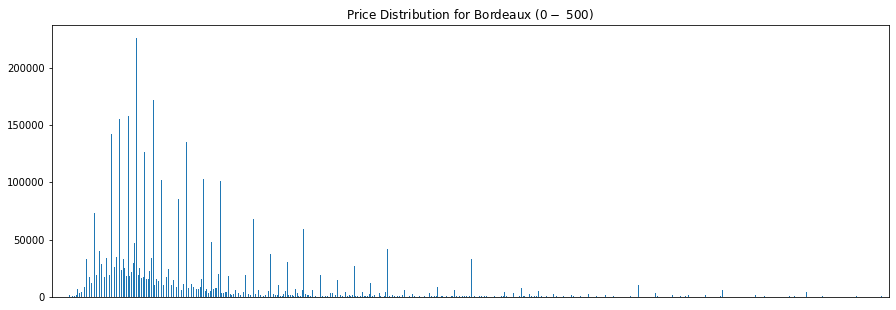

In [30]:
#(Bx_Price_dist[:1000]/cal_Bx_clean_prices_df.shape[0]).plot(kind="bar", figsize=(15, 5));
(Bx_Price_dist[:500]).plot(kind="bar", figsize=(15, 5));
plt.title("Price Distribution for Bordeaux ($ 0 - $ 500)")
#plt.xticks(np.arange(0.0, 1000.0, step=100.0), rotation='horizontal');    # Xticks() doesn't seem to display the correct values...
plt.xticks([]);
#plt.xlabel("Price (k$)");
#plt.yticks([]);

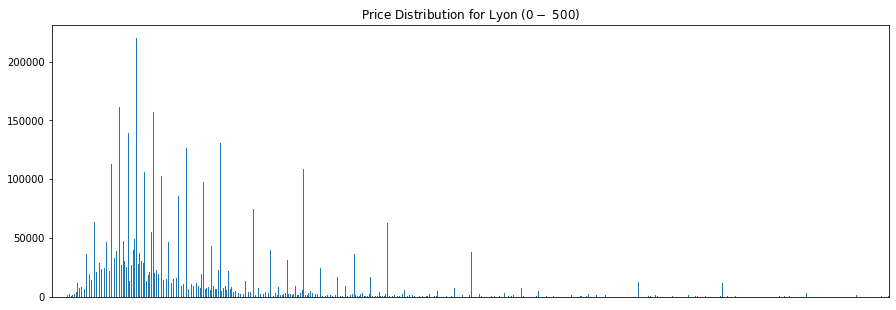

In [31]:
(Ly_Price_dist[:500]).plot(kind="bar", figsize=(15, 5));
plt.title("Price Distribution for Lyon ($ 0 - $ 500)")
plt.xticks([]);

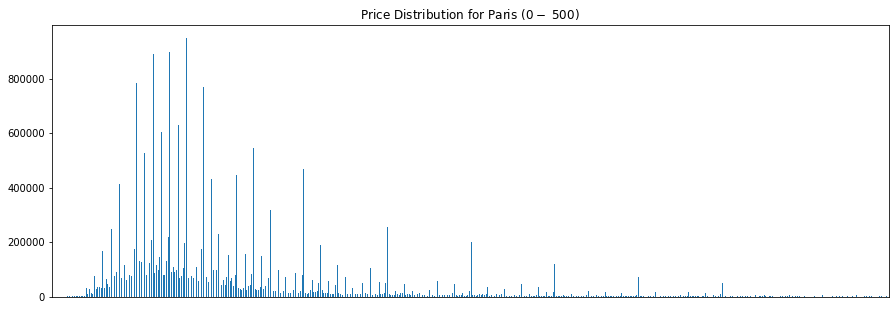

In [32]:
(Pa_Price_dist[:500]).plot(kind="bar", figsize=(15, 5));
plt.title("Price Distribution for Paris ($ 0 - $ 500)")
plt.xticks([]);

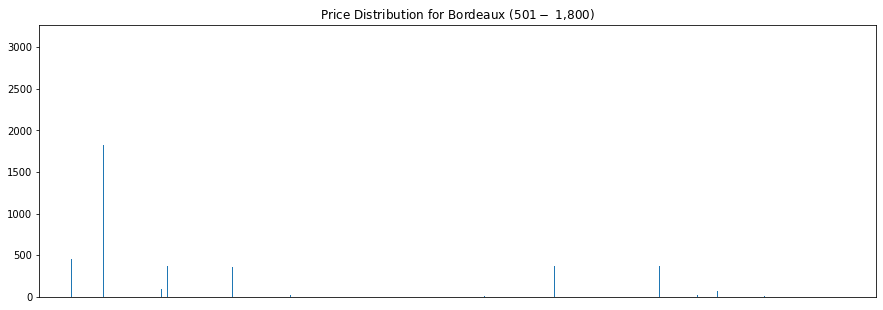

In [33]:
#(Bx_Price_dist[1001:1800]/cal_Bx_clean_prices_df.shape[0]).plot(kind="bar", figsize=(15, 5));
(Bx_Price_dist[501:1800]).plot(kind="bar", figsize=(15, 5));
plt.title("Price Distribution for Bordeaux ($ 501 - $ 1,800)")
#plt.xticks(np.arange(1000.0, 1800.0, step=100.0), rotation='horizontal');    # Doesn't display tick marks from 1000 to 18000
plt.xticks([]);
#plt.xlabel("Price (k$)");
#plt.yticks([]);

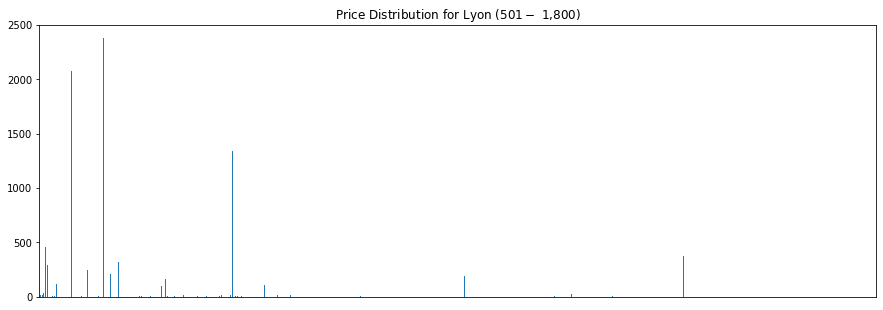

In [34]:
(Ly_Price_dist[501:1800]).plot(kind="bar", figsize=(15, 5));
plt.title("Price Distribution for Lyon ($ 501 - $ 1,800)")
plt.xticks([]);

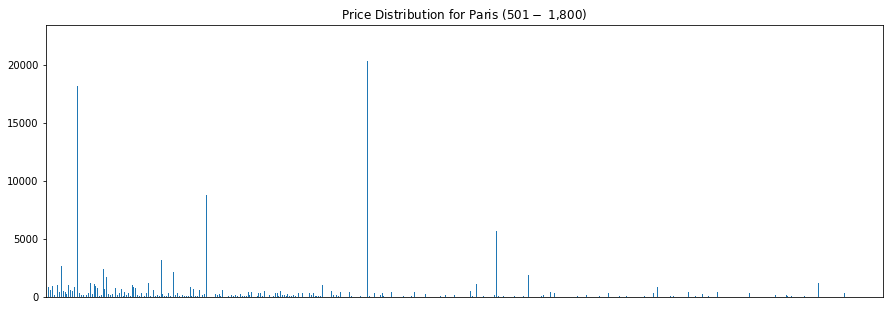

In [35]:
(Pa_Price_dist[501:1800]).plot(kind="bar", figsize=(15, 5));
plt.title("Price Distribution for Paris ($ 501 - $ 1,800)")
plt.xticks([]);

## 1 - Conclusion for Price Distribution ##
 - As seen on the first 3 plots above,  Bordeaux, Lyon, and Paris have very similar Price Distributions in the bulk of the Price range (*i.e.*, below \\$ 500).
 - The following 3 plots show that Paris has a larger offering above \\$ 500. Although Bordeaux and Lyon are beautiful cities, Paris attracts more international tourists, which may explain the difference at the high-end of the Price spectrum.
___
 
## Compare Price throughout the year for all 3 Cities ##

To avoid fluctuations due to weekday/weekend activity differences, Pricing throughout the time period is smoothed.

                price
date                 
2019-08-27        NaN
2019-08-28        NaN
2019-08-29        NaN
2019-08-30  82.875922
2019-08-31  82.839787


No handles with labels found to put in legend.


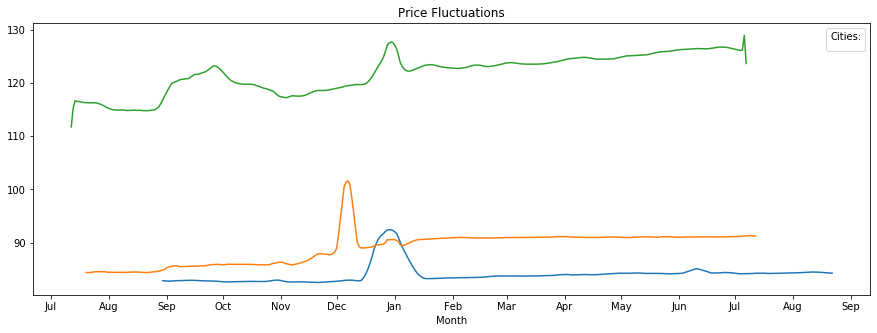

In [36]:
# Group Price data by Date and smooth over 7 rolling days
Bx_avg_price_by_date = pd.DataFrame(cal_Bx_clean_prices_df.groupby('date')['price'].mean())
Bx_rolling_avg = Bx_avg_price_by_date.rolling(window=7, center=True).mean()
print(Bx_rolling_avg.head())
Ly_avg_price_by_date = pd.DataFrame(cal_Ly_clean_prices_df.groupby('date')['price'].mean())
Ly_rolling_avg = Ly_avg_price_by_date.rolling(window=7, center=True).mean()
Pa_avg_price_by_date = pd.DataFrame(cal_Pa_clean_prices_df.groupby('date')['price'].mean())
Pa_rolling_avg = Pa_avg_price_by_date.rolling(window=7, center=True).mean()

# Plot for all 3 Cities on the same graph
loc = plt_dates.MonthLocator()
fmt = plt_dates.DateFormatter('%b')
plt.figure(figsize=(15, 5))
plt.plot(pd.to_datetime(Bx_rolling_avg.index), Bx_rolling_avg['price'])    # removed label='Bordeaux' because it doesn't work...
plt.plot(pd.to_datetime(Ly_rolling_avg.index), Ly_rolling_avg['price'])
plt.plot(pd.to_datetime(Pa_rolling_avg.index), Pa_rolling_avg['price'])
plt.legend(title='Cities:')
x_axis = plt.gca().xaxis
x_axis.set_major_locator(loc)
x_axis.set_major_formatter(fmt)
plt.xlabel('Month')
plt.title('Price Fluctuations')
plt.show()

## 2 - Conclusion for Seasonal Price Fluctuations ##
The plot above yields 2 main observations:
 - **Prices throughout the year** are much **higher in Paris** than in Lyon and in Bordeaux, which again can be explained by the fact that Paris is in the top 3 most visited cities in the World; it's also the economic capital of France and larger (pop. 2.2 M). Lyon (pop. 500 k) is larger than Bordeaux (pop. 250 k), which could explain why the prices are slightly higher in the former; also, Bordeaux is close to the Atlantic Ocean and to its many beach resorts which draw lots of tourists.
 - The **Prices peak** in all **3 Cities** around the **year-end holidays**, but Paris draws people pretty much throughout the year, with an **additional peak around the fall** when many tourists without kids - who are back in school - visit the capital after the summer heat has receded.
___
 
## What Factors have the highest influence on Pricing? ##

Instead of analyzing the 3 Cities independently, we can combine Bordeaux, Lyon, and Paris data into one big dataset to increase the amount of datapoints. And because we noticed above that the Location has indeed an influence on Price, we will add a "Bordeaux", a "Lyon", and a "Paris" column with 0s (data does not belong to this City) and 1s (data belongs to this City).

### Merge all 3 datasets and add the City columns. ###

In [37]:
# Can't figure out a way to store the values below as integers in the Dataframe, even when casting int(1)...
listings_Bx_df['Bordeaux'] = int(1)
listings_Bx_df['Lyon'] = int(0)
listings_Bx_df['Paris'] = int(0)
listings_Ly_df['Bordeaux'] = int(0)
listings_Ly_df['Lyon'] = int(1)
listings_Ly_df['Paris'] = int(0)
listings_Pa_df['Bordeaux'] = int(0)
listings_Pa_df['Lyon'] = int(0)
listings_Pa_df['Paris'] = int(1)

In [38]:
listings_df = pd.concat([listings_Bx_df, listings_Ly_df, listings_Pa_df], axis=0, sort=False).reset_index()
print("\nThe new consolidated Listings data has {} rows/datapoints and still {} features.\n".format(
    listings_df.shape[0], listings_df.shape[1]))
listings_df.head()


The new consolidated Listings data has 86987 rows/datapoints and still 110 features.



,index,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,...,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,Bordeaux,Lyon,Paris
0,0,40151,https://www.airbnb.com/rooms/40151,20190827041351,2019-08-27,Sunny flat aux Chartrons,"Situé dans le quartier des Chartrons, cet appa...","Situé dans le quartier des Chartrons, cet appa...","Situé dans le quartier des Chartrons, cet appa...",none,...,f,f,2,1,1,0,0.28,1,0,0
1,1,185534,https://www.airbnb.com/rooms/185534,20190827041351,2019-08-27,L'Echoppe des Bouilles,NaN,L’Échoppe des Bouilles est une maison typique ...,L’Échoppe des Bouilles est une maison typique ...,none,...,f,f,1,0,1,0,NaN,1,0,0
2,2,218103,https://www.airbnb.com/rooms/218103,20190827041351,2019-08-27,B&B (Website hidden by Airbnb) tropical garden,Ce studio spacieux de 35 m² est tout équipé po...,"The Bambooyard : ""Le clos des Bambous"", in Bè...","The Bambooyard : ""Le clos des Bambous"", in Bè...",none,...,f,f,4,4,0,0,0.28,1,0,0
3,3,222887,https://www.airbnb.com/rooms/222887,20190827041351,2019-08-27,"Bordeaux Terrace - spectacular view, fast Wifi","Recently renovated (February 2019), Bordeaux T...",In an 18th century building in the historic he...,"Recently renovated (February 2019), Bordeaux T...",none,...,f,f,4,4,0,0,0.38,1,0,0
4,4,317273,https://www.airbnb.com/rooms/317273,20190827041351,2019-08-27,"Bordeaux City Gardens - large 1 bd, park adjacent",A spacious one bedroom apartment (93 sq metres...,This spacious one bedroom apartment (93 sq met...,A spacious one bedroom apartment (93 sq metres...,none,...,f,f,4,4,0,0,0.31,1,0,0


### Cleaning up the Listings Data ###
1. Drop some features:
 - free text, since no NLP will be performed in the context of this project, URLs, IDs, redundancy (*e.g.*, location : just kept Zip code);
 - **% missing values**;
 - **low variability**;
 - by applying **"business common sense"**, to decide which ones appear to be the least relevant to our analysis.
2. **Impute the missing values** for the remaining features: **mode** for **categorical** and **mean** for **numerical**.
3. **One-Hot encode** the **categorical** data.
4. **Normalize** the **numerical** data.

___
**1. Drop Values**
  - Apply **Business Sense** to identify useless features (*e.g.*, free text because we won't be performing NLP here, unique IDs, URLs, redundancy):

In [39]:
# Make sure ALL features are displayed, temporarily
with pd.option_context("display.max_columns", listings_df.shape[1]):
    print(listings_df.head())

   index      id                          listing_url       scrape_id  \
0      0   40151   https://www.airbnb.com/rooms/40151  20190827041351   
1      1  185534  https://www.airbnb.com/rooms/185534  20190827041351   
2      2  218103  https://www.airbnb.com/rooms/218103  20190827041351   
3      3  222887  https://www.airbnb.com/rooms/222887  20190827041351   
4      4  317273  https://www.airbnb.com/rooms/317273  20190827041351   

  last_scraped                                               name  \
0   2019-08-27                           Sunny flat aux Chartrons   
1   2019-08-27                             L'Echoppe des Bouilles   
2   2019-08-27     B&B (Website hidden by Airbnb) tropical garden   
3   2019-08-27     Bordeaux Terrace - spectacular view, fast Wifi   
4   2019-08-27  Bordeaux City Gardens - large 1 bd, park adjacent   

                                             summary  \
0  Situé dans le quartier des Chartrons, cet appa...   
1                                 

Careful analysis of the data above - searching visually for free text, values with too much or too little diversity, etc., using "listings_df['*NAME_OF_FEATURE*'].**value_counts()**", I decided to drop the following features:

In [40]:
features_to_drop = ['index', 'id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'neighborhood_overview',
                    'notes', 'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 'picture_url',
                    'xl_picture_url', 'host_url', 'host_name', 'host_about', 'host_thumbnail_url', 'host_picture_url',
                    'host_verifications', 'host_location', 'latitude', 'longitude', 'calendar_last_scraped', 'jurisdiction_names',
                    'host_neighbourhood', 'street', 'neighbourhood', 'zipcode', 'neighbourhood_group_cleansed', 'city',
                    'state', 'country_code', 'country', 'market', 'smart_location']
print("\nRemoving {} features from a total of {}.".format(
    len(features_to_drop), listings_df.shape[1]))
listings_clean_df = listings_df.drop(features_to_drop, axis=1)
print("The clean Listings Dataframe now has {} features.\n".format(listings_clean_df.shape[1]))


Removing 41 features from a total of 110.
The clean Listings Dataframe now has 69 features.



 - **Missing Values**

In [41]:
# Make sure all rows are displayed temporarily
with pd.option_context("display.max_rows", 500):
    # Features sorted by descending percentage of missing values
    missing_values_by_feature = (listings_clean_df.isna().sum() / listings_clean_df.shape[0]).sort_values(ascending=False) * 100
    print(round(missing_values_by_feature, 2))

host_acceptance_rate                            100.00
square_feet                                      98.46
monthly_price                                    90.99
weekly_price                                     85.65
license                                          71.23
host_response_time                               39.00
host_response_rate                               39.00
security_deposit                                 32.69
cleaning_fee                                     29.48
review_scores_checkin                            24.19
review_scores_value                              24.19
review_scores_location                           24.19
review_scores_accuracy                           24.16
review_scores_communication                      24.15
review_scores_cleanliness                        24.14
review_scores_rating                             24.08
last_review                                      22.25
reviews_per_month                                22.25
first_revi

I decide to **drop all features above 50 % missing values**: none of them seem to be relevant enough to impute over half of their values.

In [42]:
features_missing = missing_values_by_feature[missing_values_by_feature > 50].index
print("\nRemoving the following {} features with too much missing data, from a total of {}:\n\n{}".format(
    features_missing.shape[0], listings_clean_df.shape[1], features_missing))
listings_clean_df = listings_clean_df.drop(features_missing, axis=1)
print("\nThe clean Listings Dataframe now has {} features.\n".format(listings_clean_df.shape[1]))


Removing the following 5 features with too much missing data, from a total of 69:

Index(['host_acceptance_rate', 'square_feet', 'monthly_price', 'weekly_price',
       'license'],
      dtype='object')

The clean Listings Dataframe now has 64 features.



___
**2. Impute Missing Values**

**N.B.**: I could use **sklearn.impute.SimpleImputer** but it looks a little more complicated than using a **lambda**... maybe next time.
 - **Categorical** Features:

In [43]:
listings_clean_object_features_df = listings_clean_df.select_dtypes(include=['object'])

with pd.option_context("display.max_columns", listings_clean_object_features_df.shape[1]):
    print(listings_clean_object_features_df.head())
    
print("\nThe clean Listings Dataframe has {} categorical features.\n".format(listings_clean_object_features_df.shape[1]))

  experiences_offered  host_since  host_response_time host_response_rate  \
0                none  2010-07-13  within a few hours               100%   
1                none  2011-07-29  a few days or more                33%   
2                none  2011-09-08      within an hour               100%   
3                none  2011-09-14      within an hour               100%   
4                none  2011-09-14      within an hour               100%   

  host_is_superhost host_has_profile_pic host_identity_verified  \
0                 f                    t                      t   
1                 f                    t                      f   
2                 t                    t                      t   
3                 t                    t                      t   
4                 t                    t                      t   

                      neighbourhood_cleansed is_location_exact property_type  \
0     Chartrons - Grand Parc - Jardin Public                

Apply **Business Sense** to the sample data above, we transform some **string** features (*i.e.*, prices, percentages) and **date** features (*e.g.*, last_review - first_review, today - host_since) into **numeric**, as well as **numeric** features (*e.g.*, host_id) into **string**.

In [44]:
# Prices => Numbers
listings_clean_df['price'] = listings_clean_df['price'].str.replace('[\$,]', '').astype('float')
listings_clean_df['security_deposit'] = listings_clean_df['security_deposit'].str.replace('[\$,]', '').astype('float')
listings_clean_df['cleaning_fee'] = listings_clean_df['cleaning_fee'].str.replace('[\$,]', '').astype('float')
listings_clean_df['extra_people'] = listings_clean_df['extra_people'].str.replace('[\$,]', '').astype('float')

# Percentages => Numbers
listings_clean_df['host_response_rate'] = listings_clean_df['host_response_rate'].str.replace('[\%,]', '').astype('float')

# IDs => Categories
listings_clean_df['host_id'] = listings_clean_df.astype({'host_id': 'category'})

# Dates => Number of Days
#    Last Review - First Review
listings_clean_df['review_span'] = (pd.to_datetime(listings_clean_df['last_review']) -
                                    pd.to_datetime(listings_clean_df['first_review'])).dt.days
listings_clean_df['review_span'].fillna(value=0, inplace=True)
listings_clean_df.drop(['first_review', 'last_review'], axis=1, inplace=True)
#    Today - Host Since
listings_clean_df['host_since'] = (pd.to_datetime(dt.date.today()) - pd.to_datetime(listings_clean_df['host_since'])).dt.days

with pd.option_context("display.max_columns", listings_clean_df.shape[1]):
    print(listings_clean_df[['price', 'security_deposit', 'cleaning_fee', 'extra_people',
                             'host_response_rate', 'host_id', 'review_span', 'host_since']].head())

   price  security_deposit  cleaning_fee  extra_people  host_response_rate  \
0   71.0               NaN          10.0          15.0               100.0   
1   75.0               NaN           NaN           0.0                33.0   
2  100.0               NaN           NaN          20.0               100.0   
3  175.0             100.0          60.0           0.0               100.0   
4  155.0             200.0          80.0          20.0               100.0   

  host_id  review_span  host_since  
0    none       2141.0      3377.0  
1    none          0.0      2996.0  
2    none       2816.0      2955.0  
3    none       2700.0      2949.0  
4    none       1818.0      2949.0  


**Impute** missing **categorical** values with the **Mode**:

In [45]:
listings_clean_object_features_df = listings_clean_df.select_dtypes(include=['object'])
fill_mode = lambda col: col.fillna(col.mode()[0])    # notice the [0], for whatever reason...
listings_clean_object_features_df = listings_clean_object_features_df.apply(fill_mode, axis=0);    # apply() doesn't offer an "inplace" option

with pd.option_context("display.max_columns", listings_clean_object_features_df.shape[1]):
    print(listings_clean_object_features_df.head())

print("\nThe clean Listings Dataframe has {} categorical features.\n".format(listings_clean_object_features_df.shape[1]))

  experiences_offered host_id  host_response_time host_is_superhost  \
0                none    none  within a few hours                 f   
1                none    none  a few days or more                 f   
2                none    none      within an hour                 t   
3                none    none      within an hour                 t   
4                none    none      within an hour                 t   

  host_has_profile_pic host_identity_verified  \
0                    t                      t   
1                    t                      f   
2                    t                      t   
3                    t                      t   
4                    t                      t   

                      neighbourhood_cleansed is_location_exact property_type  \
0     Chartrons - Grand Parc - Jardin Public                 t     Apartment   
1  Saint Augustin - Tauzin - Alphonse Dupeux                 t         House   
2                                     

The large number of **amenities** would generate too many extra features if **one-hot encoded**, so I'm just going to replace each value with its **amenities count**.

In [46]:
listings_clean_df['num_amenities'] = \
    listings_clean_object_features_df['amenities'].apply(lambda list : list.count(',') + 1)
listings_clean_object_features_df.drop(['amenities'], axis=1, inplace=True)

 - **Numerical** Features:

In [47]:
listings_clean_num_features_df = listings_clean_df.select_dtypes(include=['int64', 'float64'])

with pd.option_context("display.max_columns", listings_clean_num_features_df.shape[1]):
    print(listings_clean_num_features_df.head())

print("\nThe clean Listings Dataframe has {} numerical features.\n".format(listings_clean_num_features_df.shape[1]))

   host_since  host_response_rate  host_listings_count  \
0      3377.0               100.0                  2.0   
1      2996.0                33.0                  1.0   
2      2955.0               100.0                  4.0   
3      2949.0               100.0                  8.0   
4      2949.0               100.0                  8.0   

   host_total_listings_count  accommodates  bathrooms  bedrooms  beds  price  \
0                        2.0             2        1.0       1.0   1.0   71.0   
1                        1.0             2        3.0       1.0   1.0   75.0   
2                        4.0             4        1.0       1.0   1.0  100.0   
3                        8.0             4        1.0       2.0   3.0  175.0   
4                        8.0             3        1.5       1.0   2.0  155.0   

   security_deposit  cleaning_fee  guests_included  extra_people  \
0               NaN          10.0                2          15.0   
1               NaN           NaN 

**Impute** missing **numerical** values with the **Mean** ('Bordeaux', 'Lyon', and 'Paris' won't be affected, since we know they have non NaNs):

In [48]:
fill_mean = lambda col: col.fillna(col.mean())
listings_clean_num_features_df = listings_clean_num_features_df.apply(fill_mean, axis=0)    # apply() doesn't offer an "inplace" option

with pd.option_context("display.max_columns", listings_clean_num_features_df.shape[0]):
    print(listings_clean_num_features_df.head())

print("\nThe clean Listings Dataframe has {} numerical features.\n".format(listings_clean_num_features_df.shape[1]))

   host_since  host_response_rate  host_listings_count  \
0      3377.0               100.0                  2.0   
1      2996.0                33.0                  1.0   
2      2955.0               100.0                  4.0   
3      2949.0               100.0                  8.0   
4      2949.0               100.0                  8.0   

   host_total_listings_count  accommodates  bathrooms  bedrooms  beds  price  \
0                        2.0             2        1.0       1.0   1.0   71.0   
1                        1.0             2        3.0       1.0   1.0   75.0   
2                        4.0             4        1.0       1.0   1.0  100.0   
3                        8.0             4        1.0       2.0   3.0  175.0   
4                        8.0             3        1.5       1.0   2.0  155.0   

   security_deposit  cleaning_fee  guests_included  extra_people  \
0        404.425944     10.000000                2          15.0   
1        404.425944     36.079474 

___
**3. One-Hot Encode** the **Categorical** data
 - ~~Start with the **amenities** column, which needs to be parsed:~~
 
 Forget one-hot encoding individual **amenities**, it creates too many new features and is prone to overfitting.

In [49]:
'''print(listings_clean_object_features_df['amenities'][0])

# Remove double-quotes
listings_clean_object_features_df['amenities'] = \
    listings_clean_object_features_df['amenities'].str.replace('["{}]', '', regex=True)
print(listings_clean_object_features_df['amenities'][0])

# One-hot encode the amenities
amenities_df = listings_clean_object_features_df['amenities'].str.get_dummies(sep = ",")
amenities_df.head()

# Remove the 'amenities' column because it's been replaced by the one-hot encoded features above
#listings_clean_object_features_df.drop('amenities', axis=1, inplace=True)'''

'print(listings_clean_object_features_df[\'amenities\'][0])\n\n# Remove double-quotes\nlistings_clean_object_features_df[\'amenities\'] =     listings_clean_object_features_df[\'amenities\'].str.replace(\'["{}]\', \'\', regex=True)\nprint(listings_clean_object_features_df[\'amenities\'][0])\n\n# One-hot encode the amenities\namenities_df = listings_clean_object_features_df[\'amenities\'].str.get_dummies(sep = ",")\namenities_df.head()\n\n# Remove the \'amenities\' column because it\'s been replaced by the one-hot encoded features above\n#listings_clean_object_features_df.drop(\'amenities\', axis=1, inplace=True)'

 - The other columns are encoded *via* **get_dummies()**:

In [50]:
object_cols = listings_clean_object_features_df.columns

for col in object_cols:
    try:
        listings_clean_object_features_df = pd.concat([
            listings_clean_object_features_df.drop(col, axis=1),
            pd.get_dummies(listings_clean_object_features_df[col],
                           prefix=col, prefix_sep='_', drop_first=True)],
            axis=1)
    except:
        continue
        
with pd.option_context("display.max_columns", listings_clean_object_features_df.shape[1]):
    print(listings_clean_object_features_df.head())

print("\nThe clean Listings Dataframe has {} categorical features.\n".format(listings_clean_object_features_df.shape[1]))

   host_response_time_within a day  host_response_time_within a few hours  \
0                                0                                      1   
1                                0                                      0   
2                                0                                      0   
3                                0                                      0   
4                                0                                      0   

   host_response_time_within an hour  host_is_superhost_t  \
0                                  0                    0   
1                                  0                    0   
2                                  1                    1   
3                                  1                    1   
4                                  1                    1   

   host_has_profile_pic_t  host_identity_verified_t  \
0                       1                         1   
1                       1                         0   
2    

I notice above that **calendar_updated** could be narrowed down to **calendar_updated_up_to_1_year**, **calendar_updated_over_1_year**, while keeping **calendar_updated_never**:

In [51]:
# Merge all columns up to 1 year into a new column, then drop the original ones
regular_expression_up_to_1_year = \
    "calendar_updated_((([0-9]|[1-9][0-9]|[1-2][0-9][0-9]|3[0-5][0-9]|36[0-5]|a) day.*)" + \
    "|(([0-9]|[1-4][0-9]|5[0-2]|a) week.*)" + \
    "|(([0-9]|1[0-2]|a) month.*)" + \
    "|(today|yesterday))"
calendar_updated_up_to_1_year = listings_clean_object_features_df.filter(regex=regular_expression_up_to_1_year)
print("\nUpdated up to 1 year ago:\n{}".format(calendar_updated_up_to_1_year.columns))
listings_clean_object_features_df['calendar_updated_up_to_1_year'] = \
    listings_clean_object_features_df[calendar_updated_up_to_1_year.columns].sum(axis=1)
listings_clean_object_features_df.drop(calendar_updated_up_to_1_year.columns, axis = 1, inplace = True)

with pd.option_context("display.max_columns", listings_clean_object_features_df.shape[1]):
    print()
    print(listings_clean_object_features_df.head())

print("\nThe clean Listings Dataframe has {} categorical features.\n".format(listings_clean_object_features_df.shape[1]))


Updated up to 1 year ago:
Index(['calendar_updated_10 months ago', 'calendar_updated_11 months ago',
       'calendar_updated_12 months ago', 'calendar_updated_2 days ago',
       'calendar_updated_2 months ago', 'calendar_updated_2 weeks ago',
       'calendar_updated_3 days ago', 'calendar_updated_3 months ago',
       'calendar_updated_3 weeks ago', 'calendar_updated_4 days ago',
       'calendar_updated_4 months ago', 'calendar_updated_4 weeks ago',
       'calendar_updated_5 days ago', 'calendar_updated_5 months ago',
       'calendar_updated_5 weeks ago', 'calendar_updated_6 days ago',
       'calendar_updated_6 months ago', 'calendar_updated_6 weeks ago',
       'calendar_updated_7 months ago', 'calendar_updated_7 weeks ago',
       'calendar_updated_8 months ago', 'calendar_updated_9 months ago',
       'calendar_updated_a week ago', 'calendar_updated_today',
       'calendar_updated_yesterday'],
      dtype='object')

   host_response_time_within a day  host_response_time_wit

In [52]:
# Merge all columns over 1 year into a new column, then drop the original ones
regular_expression_over_1_year = "calendar_updated_(?!less_1_year|never)"
calendar_updated_over_1_year = listings_clean_object_features_df.filter(regex=regular_expression_over_1_year)
print("\nUpdated over 1 year ago:\n{}".format(calendar_updated_over_1_year.columns))
listings_clean_object_features_df['calendar_updated_over_1_year'] = \
    listings_clean_object_features_df[calendar_updated_over_1_year.columns].sum(axis=1)
listings_clean_object_features_df.drop(calendar_updated_over_1_year.columns, axis = 1, inplace = True)

with pd.option_context("display.max_columns", listings_clean_object_features_df.shape[1]):
    print()
    print(listings_clean_object_features_df.head())

print("\nThe clean Listings Dataframe has {} categorical features.\n".format(listings_clean_object_features_df.shape[1]))


Updated over 1 year ago:
Index(['calendar_updated_13 months ago', 'calendar_updated_14 months ago',
       'calendar_updated_15 months ago', 'calendar_updated_16 months ago',
       'calendar_updated_17 months ago', 'calendar_updated_18 months ago',
       'calendar_updated_19 months ago', 'calendar_updated_20 months ago',
       'calendar_updated_21 months ago', 'calendar_updated_22 months ago',
       'calendar_updated_23 months ago', 'calendar_updated_24 months ago',
       'calendar_updated_25 months ago', 'calendar_updated_26 months ago',
       'calendar_updated_27 months ago', 'calendar_updated_28 months ago',
       'calendar_updated_29 months ago', 'calendar_updated_30 months ago',
       'calendar_updated_31 months ago', 'calendar_updated_32 months ago',
       'calendar_updated_33 months ago', 'calendar_updated_34 months ago',
       'calendar_updated_35 months ago', 'calendar_updated_36 months ago',
       'calendar_updated_37 months ago', 'calendar_updated_38 months ago',

___
**4. Normalize** the **Numerical** data
 
 A comparison between several sklearn Scalers: [Compare the effect of different scalers on data with outliers](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html)

In [53]:
# This works below, but I'm going to use the 
#listings_clean_num_features_df = (listings_clean_num_features_df - listings_clean_num_features_df.min()) / \
#                                 (listings_clean_num_features_df.max() - listings_clean_num_features_df.min())

scaler = MinMaxScaler()
listings_clean_num_features_df = pd.DataFrame(scaler.fit_transform(listings_clean_num_features_df),
                                              columns = listings_clean_num_features_df.columns)

with pd.option_context("display.max_columns", listings_clean_num_features_df.shape[0]):
    print(listings_clean_num_features_df.head())

   host_since  host_response_rate  host_listings_count  \
0    0.828401                1.00             0.001403   
1    0.733648                0.33             0.000701   
2    0.723452                1.00             0.002805   
3    0.721960                1.00             0.005610   
4    0.721960                1.00             0.005610   

   host_total_listings_count  accommodates  bathrooms  bedrooms  beds  \
0                   0.001403        0.0625       0.02      0.02  0.02   
1                   0.000701        0.0625       0.06      0.02  0.02   
2                   0.002805        0.1875       0.02      0.02  0.02   
3                   0.005610        0.1875       0.02      0.04  0.06   
4                   0.005610        0.1250       0.03      0.02  0.04   

      price  security_deposit  cleaning_fee  guests_included  extra_people  \
0  0.007553          0.085322      0.014286         0.066667      0.053004   
1  0.007979          0.085322      0.051542         0.00

___
**Merge** the **Categorical** and the **Numerical** datasets again:

In [54]:
#listings_clean_df = pd.concat((amenities_df, listings_clean_object_features_df, listings_clean_num_features_df), axis=1)
listings_clean_df = pd.concat((listings_clean_object_features_df, listings_clean_num_features_df), axis=1)

with pd.option_context("display.max_columns", listings_clean_df.shape[0]):
    print(listings_clean_df.head())

print("\nThe clean Listings Dataframe has {} features.\n".format(listings_clean_df.shape[1]))

   host_response_time_within a day  host_response_time_within a few hours  \
0                                0                                      1   
1                                0                                      0   
2                                0                                      0   
3                                0                                      0   
4                                0                                      0   

   host_response_time_within an hour  host_is_superhost_t  \
0                                  0                    0   
1                                  0                    0   
2                                  1                    1   
3                                  1                    1   
4                                  1                    1   

   host_has_profile_pic_t  host_identity_verified_t  \
0                       1                         1   
1                       1                         0   
2    

___
# 3- What Features influence Price ? #
### Predicting Prices ###

I'll use a simple **Linear Regression** model.

In [55]:
# Split the feature to predict 'price' into y and the features used to predict into X
y = listings_clean_df['price']
X = listings_clean_df.drop(['price'], axis=1)
#print("\ny:\n{}\n\nX:\n{}".format(y.head(), X.head()))

# Further split into Training and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)
print("\nThere are {} training datapoints and {} testing datapoints.\n".format(X_train.shape[0], X_test.shape[0]))

# Fit the model on the Training data and predict prices for both Training and Test data
lr_model = LinearRegression(normalize=True)
lr_model.fit(X_train, y_train)
y_train_predictions = lr_model.predict(X_train)
y_test_predictions = lr_model.predict(X_test)

# Calculate the R2 scores for both data sets
r2_train = r2_score(y_train, y_train_predictions)
r2_test = r2_score(y_test, y_test_predictions)
print("\nTraining Data: R2 = {}\nTesting Data: R2 = {}\n".format(r2_train, r2_test))


There are 65240 training datapoints and 21747 testing datapoints.


Training Data: R2 = 0.25614425336407887
Testing Data: R2 = -2.8072802760712124e+25



**Not great!**, I now try with a **Random Forest Regression** model.

In [56]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_train_predictions = rf_model.predict(X_train)
y_test_predictions = rf_model.predict(X_test)

# Calculate the R2 scores for both data sets
r2_train = r2_score(y_train, y_train_predictions)
r2_test = r2_score(y_test, y_test_predictions)
print("\nTraining Data: R2 = {}\nTesting Data: R2 = {}\n".format(r2_train, r2_test))


Training Data: R2 = 0.8983515422448276
Testing Data: R2 = 0.4251192279657675



**Much better!** Now I can do some **parameter tuning** to try to **improve** the **R2** score, using **Cross Validation** with **RandomizedSearchCV**.

In [57]:
print("\nThe parameters of the initial Random Forest Regressor model are:\n")
pprint(rf_model.get_params())


The parameters of the initial Random Forest Regressor model are:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [58]:
# Set the random search grid
rs_grid = {'n_estimators': [100, 200, 400, 600],
           'max_features': ['auto', 'sqrt'],
           'max_depth': [5, 10, 50, 100, None],
           'min_samples_split': [2, 5, 10],
           'min_samples_leaf': [1, 2, 4],
           'bootstrap': [True, False]}

def random_search_cross_validation(model, train_X, train_y, params, iterations, k, verbose=2, random_state=68, n_jobs=-1):
    """
    Description:
        This function returns the best model found using Random Search Cross-Validation.
    
    Arguments:
        model: a regression model, such as LinearRegression, RandomForestRegressor, etc;
        train_X: the DataFrame containing the training features for predicting train_y below;
        train_y: the training feature to be predicted;
        params: the Random Search grid containing the parameters for creating a RandomizedSearchCV;
        iterations: the number of iterations for the Random Search algorithm
        k : the training set is split into a number of folds (it's called K-fold Cross-Validation)
        verbose: the level of logging that will appear in the Jupyter Lab console (2 by default)
        random_state: seed for random sampling (68 by default... my year of birth!)
        n_jobs: number of jobs to run in parallel (-1 by default, meaning all of the computer's processors will be used)
        
    Returns:
        The best model found using Random Search Cross-Validation.
    """
    rs_cv = RandomizedSearchCV(estimator=model, param_distributions=params, n_iter=iterations,
                               cv=k, verbose=verbose, random_state=random_state, n_jobs=n_jobs)
    rs_cv.fit(train_X, train_y)
    return rs_cv

# 3-fold Cross-Validation, 50 iterations, and use all cores
best_model = random_search_cross_validation(rf_model, X_train, y_train, rs_grid, 50, 3)
print("\nThe best parameters found so far are:\n\n")
pprint(best_model.best_params_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 39.4min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 158.0min finished



The best parameters found so far are:


{'bootstrap': False,
 'max_depth': 50,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 400}


Because it ran in 587.1 minutes... I commented out the Random Search above. The **best parameters** found are:

{'bootstrap': False,  
 'max_depth': None,  
 'max_features': 'sqrt',  
 'min_samples_leaf': 1,  
 'min_samples_split': 5,  
 'n_estimators': 200}

From the **most important features** yielded by the **best model** above, we can finally figure out what factors influence the most the **price** of an **Airbnb** rental in 3 large cities in **France**.

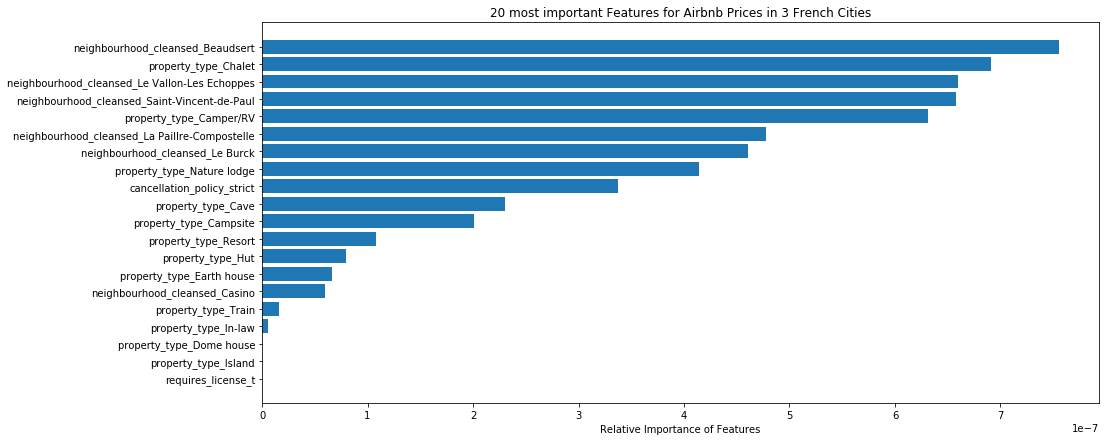

In [59]:
feature_importances = best_model.best_estimator_.feature_importances_
indices = np.argsort(feature_importances)[:20]    # We limit to the top 20 features
features = X.columns
plt.figure(figsize=(15, 7))
plt.title("20 most important Features for Airbnb Prices in 3 French Cities")
plt.barh(range(len(indices)), feature_importances[indices], align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel("Relative Importance of Features");

## 3 - Conclusion for Features influencing Prices ##
The plot above is overwhelmingly comprised of **features** related to:
 - **Neighbourhood**: other than the **city**, **neighbourhood_cleansed** is the only **location**-specifc feature left after the data was cleaned. It makes complete sense because people will pay more to stay in a nice neighborhood, and it's more likely to contain higher-class housing. The **data** was able to confirm this intuition.
 - **Property Type**: this is related to the point above. It's interesting to see that **lower-value housing** (*e.g.*, camper/RV, chalet, cave, campsite, hut, earth house, dome house) are just as likely - or even slightly more - to **influence prices** as **higher-value housing** (*e.g.*, resort, train, casino, island).